#### Author: Brenten Canfield, Spring 2019

##### First thing's first, I have done some imports and defined some functions to use for data exploration.

In [1]:
import pandas as pd
  
import sklearn.model_selection

def loadData():
    return pd.read_csv("raw-data.csv", index_col=0)
def saveData(df, fileName):
    df.to_csv(fileName)
def splitData( df, ratio ):
    dataTrain, dataTest = sklearn.model_selection.train_test_split( df, test_size=ratio, random_state=42 )
    return dataTrain, dataTest


def displayHistogramPlots(df): 
    headers = list(df)
    for i in range(len(headers)):
        plt.hist(df[headers[i]],bins=30, log=True, label=headers[i])
        plt.xlabel(headers[i], fontsize=20)
        plt.show()

def displayScatterPlots(df): 
    headers = list(df)
    for i in range(1, len(headers)):
        plt.scatter(df[headers[i]],df['labels'], )
        plt.yscale("symlog")
        plt.ylabel('labels', fontsize=20)
        plt.xlabel(headers[i], fontsize=20)
        plt.show()

def removeOutliers(df):
    df = df[ df.labels >= -2000 ]
    df = df[ (df.x1 >= 10) & (df.x1 <= 24) ]
    df = df[ df.x2 <= 35 ]
    df = df[ (df.x3 <= 70) & (df.x3 >= 25)]
    df = df[ (df.x4 <= 80) & (df.x4 >= 15)]
    df = df[ df.x5 >= 40 ]
    df = df[ (df.x6 <= 90) & (df.x6 >= 18)]
    return df

def displayData(df):
    displayHistogramPlots(df)
    displayScatterPlots(df)

##### Next I load and display histograms and scatter plots, for the raw (somewhat random) data, that was provided.

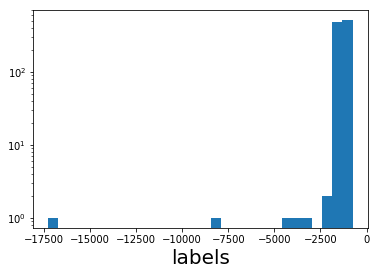

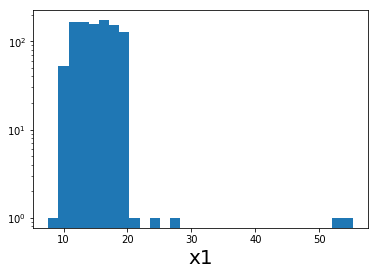

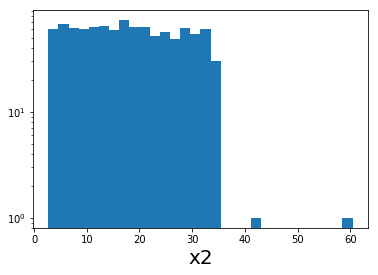

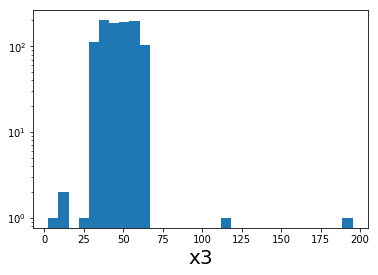

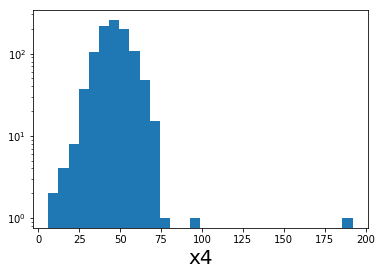

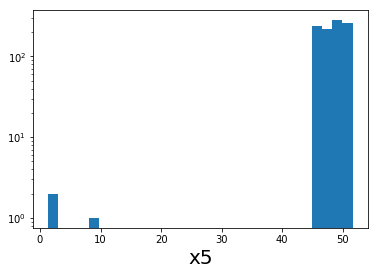

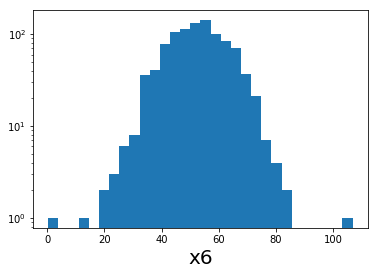

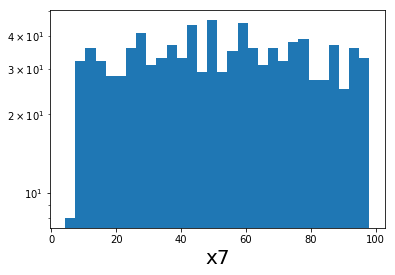

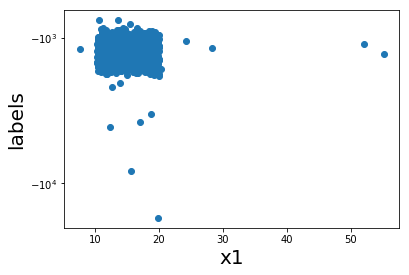

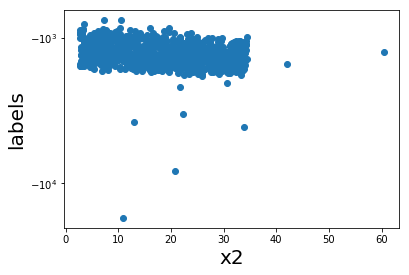

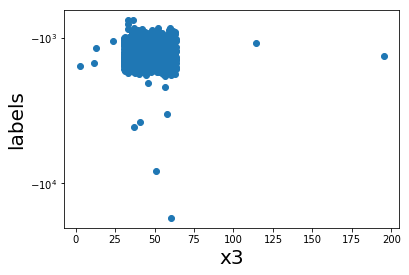

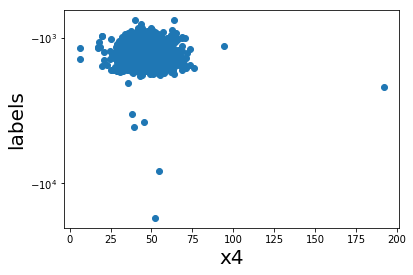

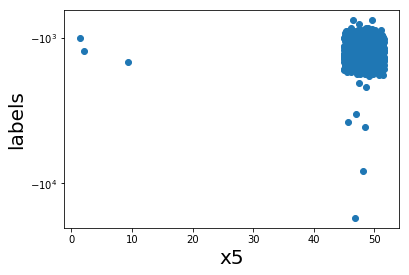

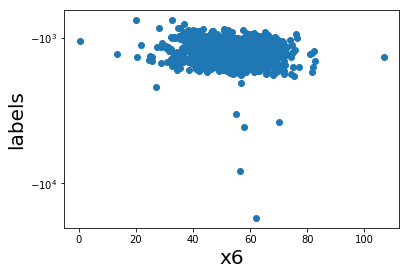

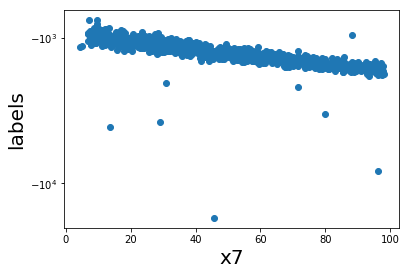

In [2]:
rawData = loadData()
displayData(rawData)

##### After examining the raw data, I have defined a function to remove all outliers, for each feature. This had a dramatic impact on the ease of interpreting the data. 

##### As we can see below, the histograms, and scatter plots, show clean distibutions for the labels, and each feature. The correlation, as seen in the scatter plots, between each feature and the labels, are as follows:

- X1

    Mostly uniform, with little to no correlation

- X2
    
    A slight negative correlation
   
- X3

    Similar to X1, with little to no correlation

- X4
    
    Mostly a clustered blob, no correlation
    
- X5

    Similar to X1 and X3, wwith little to no correlation
    
- X6
    
    A blob like cluster with a slight negative correlation

- X7
    
    A negatively correlated line, with noise along line


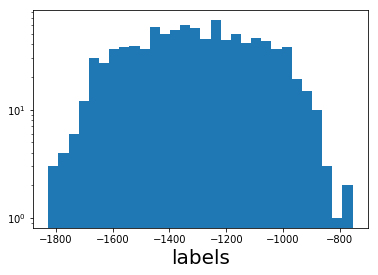

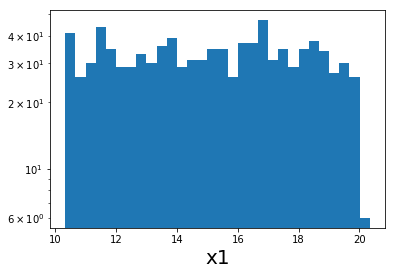

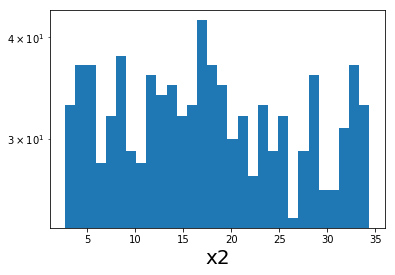

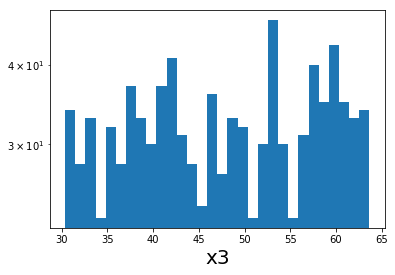

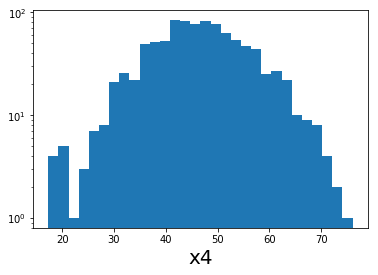

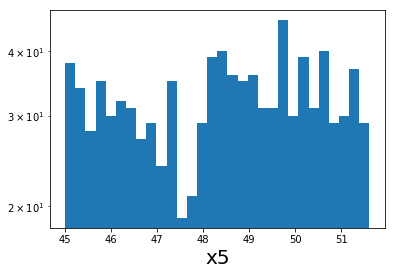

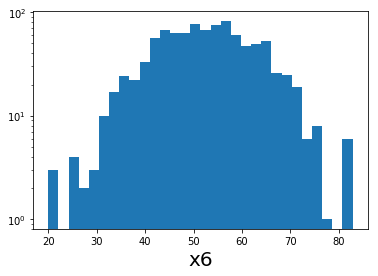

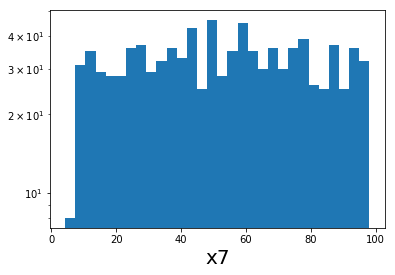

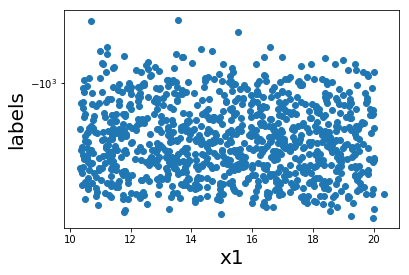

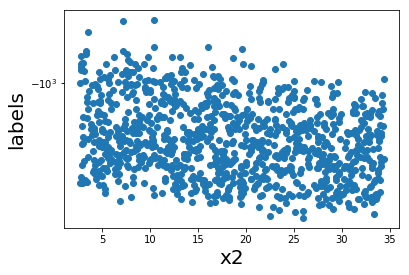

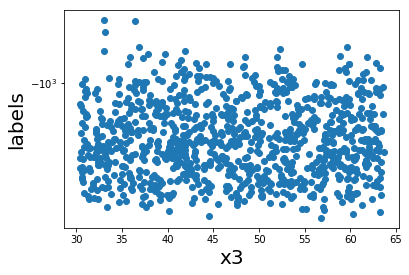

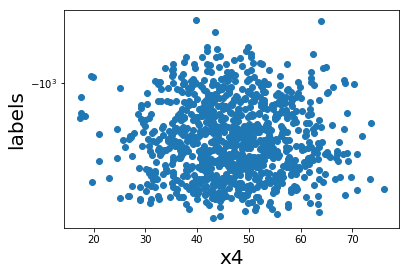

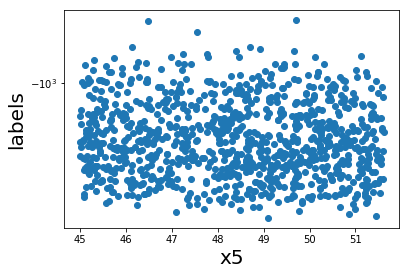

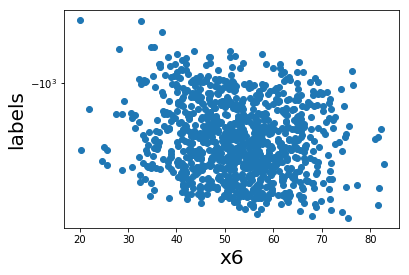

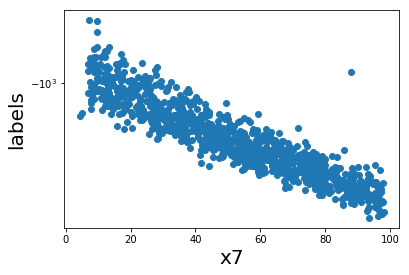

In [3]:
cleanData = removeOutliers(rawData)
displayData(cleanData)

##### Now that we have a clean data set, the data is saved to a .csv file.

In [4]:
saveData(cleanData, "clean-data.csv")

##### Final step was to split the data into training, and test data. The split is %80 to %20, respectively. And each data set is saved to a .csv file.

In [5]:
trainData, testData = splitData(cleanData, .2)
saveData(trainData, "train-data.csv")
saveData(testData, "test-data.csv")